In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#load "packages" I forgot what they are called in python already
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split

C:\Users\mkelly\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#obtain dataset
rawData = pd.read_csv("C:/Users/mkelly/Desktop/Course 5/CreditData.csv", header = 0)

In [4]:
#check out attributes and data
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AgeBins7,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,4,1,2,2,-2,-2,...,-15000,-15000,-15000,0,0,0,0,0,0,1
1,200000,1,1,2,4,1,-2,-2,-2,-2,...,-7905,-10213,-11060,0,0,0,0,0,0,0
2,220000,1,3,1,7,1,-2,-2,-2,-2,...,-4620,-5820,-5820,0,0,0,0,0,0,0
3,100000,2,1,2,2,1,-2,-2,-2,-2,...,-4894,-4894,-4894,0,0,0,0,0,0,0
4,50000,1,2,2,1,-1,-1,-2,-2,-2,...,-3650,-3650,-3650,0,0,0,0,0,0,0


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28742 entries, 0 to 28741
Data columns (total 24 columns):
LIMIT_BAL    28742 non-null int64
SEX          28742 non-null int64
EDUCATION    28742 non-null int64
MARRIAGE     28742 non-null int64
AgeBins7     28742 non-null int64
PAY_1        28742 non-null int64
PAY_2        28742 non-null int64
PAY_3        28742 non-null int64
PAY_4        28742 non-null int64
PAY_5        28742 non-null int64
PAY_6        28742 non-null int64
BILL_AMT1    28742 non-null int64
BILL_AMT2    28742 non-null int64
BILL_AMT3    28742 non-null int64
BILL_AMT4    28742 non-null int64
BILL_AMT5    28742 non-null int64
BILL_AMT6    28742 non-null int64
PAY_AMT1     28742 non-null int64
PAY_AMT2     28742 non-null int64
PAY_AMT3     28742 non-null int64
PAY_AMT4     28742 non-null int64
PAY_AMT5     28742 non-null int64
PAY_AMT6     28742 non-null int64
default      28742 non-null int64
dtypes: int64(24)
memory usage: 5.3 MB


In [6]:
#make some variables categorical...
rawData['default'] = rawData['default'].astype('category')
rawData['SEX'] = rawData['SEX'].astype('category')
rawData['AgeBins7'] = rawData['AgeBins7'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')

In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28742 entries, 0 to 28741
Data columns (total 24 columns):
LIMIT_BAL    28742 non-null int64
SEX          28742 non-null category
EDUCATION    28742 non-null category
MARRIAGE     28742 non-null category
AgeBins7     28742 non-null category
PAY_1        28742 non-null int64
PAY_2        28742 non-null int64
PAY_3        28742 non-null int64
PAY_4        28742 non-null int64
PAY_5        28742 non-null int64
PAY_6        28742 non-null int64
BILL_AMT1    28742 non-null int64
BILL_AMT2    28742 non-null int64
BILL_AMT3    28742 non-null int64
BILL_AMT4    28742 non-null int64
BILL_AMT5    28742 non-null int64
BILL_AMT6    28742 non-null int64
PAY_AMT1     28742 non-null int64
PAY_AMT2     28742 non-null int64
PAY_AMT3     28742 non-null int64
PAY_AMT4     28742 non-null int64
PAY_AMT5     28742 non-null int64
PAY_AMT6     28742 non-null int64
default      28742 non-null category
dtypes: category(5), int64(19)
memory usage: 4.3 MB


In [109]:
features = rawData.iloc[:, 1:5]

In [110]:
features.head()

,SEX,EDUCATION,MARRIAGE,AgeBins7
0,2,2,1,4
1,1,1,2,4
2,1,3,1,7
3,2,1,2,2
4,1,2,2,1


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28742 entries, 0 to 28741
Data columns (total 5 columns):
LIMIT_BAL    28742 non-null int64
SEX          28742 non-null category
EDUCATION    28742 non-null category
MARRIAGE     28742 non-null category
AgeBins7     28742 non-null category
dtypes: category(4), int64(1)
memory usage: 337.6 KB


In [11]:
depVar = rawData['default']

In [12]:
print(depVar)

0        1
1        0
2        0
3        0
4        0
5        1
6        0
7        0
8        1
9        1
10       1
11       1
12       0
13       1
14       0
15       0
16       1
17       0
18       1
19       0
20       0
21       1
22       1
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
28712    0
28713    0
28714    1
28715    0
28716    0
28717    0
28718    0
28719    0
28720    0
28721    1
28722    0
28723    0
28724    0
28725    0
28726    0
28727    0
28728    0
28729    0
28730    0
28731    1
28732    0
28733    0
28734    0
28735    0
28736    0
28737    0
28738    0
28739    0
28740    0
28741    0
Name: default, Length: 28742, dtype: category
Categories (2, int64): [0, 1]


In [13]:
depVar.head()

0    1
1    0
2    0
3    0
4    0
Name: default, dtype: category
Categories (2, int64): [0, 1]

In [111]:
#train sets x
x_train = (features[: -7185])
y_train = (depVar[: -7185])

In [112]:
#test sets
x_test = (features[: -21557])
y_test = (depVar[: -21557])

In [113]:
#check counts
x_train_count = len(x_train.index)
y_train_count = len(y_train.index)
x_test_count = len(x_test.index)
y_test_count = len(y_test.index)

In [114]:
print(x_train_count)
print(y_train_count)
print(x_test_count)
print(y_test_count)

21557
21557
7185
7185


In [115]:
#create train-test split -
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)

In [116]:
x_train.shape, x_test.shape

((16167, 4), (5390, 4))

In [117]:
y_train.shape, y_test.shape

((16167,), (5390,))

In [21]:
#hmmm? 

In [22]:
#select three models to evaluate
#decision tree DecisionTreeClassifier
from sklearn import tree

In [23]:
clf = tree.DecisionTreeClassifier()

In [24]:
clf = clf.fit(x_train, y_train)

In [25]:
print(cross_val_score(clf, x_train, y_train, cv=10))

[0.72418058 0.73840445 0.72850959 0.72479901 0.73840445 0.72603587
 0.73407545 0.72648515 0.73391089 0.73638614]


In [26]:
#.648 pretty okay model

In [27]:
clfpredictions = clf.predict(x_test)

In [28]:
print(clfpredictions)

[0 0 0 ... 0 0 0]


In [29]:
#confusion matrix?
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, clfpredictions)

array([[3800,  203],
       [1283,  104]], dtype=int64)

In [31]:
#accuracy metrics
from sklearn.metrics import accuracy_score

In [32]:
y_pred = clfpredictions

In [33]:
y_true = y_test

In [34]:
accuracy_score(y_true, y_pred)

0.72430426716141

In [35]:
accuracy_score(y_true, y_pred, normalize=False)

3904

In [36]:
#Decision Tree model accuracy ~65%

In [37]:
from sklearn.metrics import cohen_kappa_score

In [38]:
cohen_kappa_score(y_true, y_pred)

0.0325523170434453

In [39]:
#.17 Kappa

In [40]:
#KNN classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
modelKNN = KNeighborsClassifier()

In [43]:
modelKNN = modelKNN.fit(x_train, y_train)

In [44]:
KNNpredictions = modelKNN.predict(x_test)

In [45]:
print(KNNpredictions)

[0 0 1 ... 0 0 0]


In [46]:
knnpred = KNNpredictions

In [47]:
confusion_matrix(y_true, knnpred)

array([[3590,  413],
       [1196,  191]], dtype=int64)

In [48]:
accuracy_score(y_true, knnpred)

0.7014842300556586

In [49]:
cohen_kappa_score(y_true, knnpred)

0.042345876112550584

In [50]:
#KNN metrics ~68%, .14 Kappa

In [51]:
#Adaboost classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
ada = AdaBoostClassifier()

In [54]:
modelADA = ada.fit(x_train, y_train)

In [55]:
ADApred = modelADA.predict(x_test)

In [56]:
adaconf = confusion_matrix(y_true, ADApred)

In [57]:
adaconf

array([[3999,    4],
       [1386,    1]], dtype=int64)

In [58]:
accuracy_score(y_true, ADApred)

0.7421150278293135

In [59]:
cohen_kappa_score(y_true, ADApred)

-0.0004126046032788544

In [60]:
#AdaBoost ~74% accuracy, .28 Kappa

In [61]:
#ensemble RF

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier()

In [64]:
modelRF = rf.fit(x_train, y_train)

In [65]:
rfpred = modelRF.predict(x_test)

In [66]:
confusion_matrix(y_true, rfpred)

array([[3734,  269],
       [1242,  145]], dtype=int64)

In [67]:
accuracy_score(y_true, rfpred)

0.7196660482374768

In [68]:
#72% random forest ensemble...

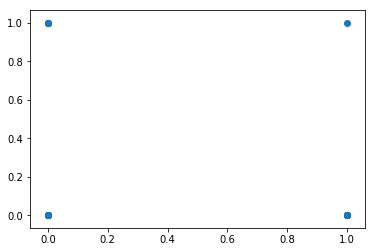

In [69]:
plt.scatter(y_true, ADApred)

In [70]:
#beautiful

In [71]:
#visualize ADA

In [72]:
import itertools

In [73]:
import matplotlib.pyplot as plt

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

In [75]:
plot_confusion_matrix(adaconf, classes=[0,1])

Confusion matrix, without normalization


In [76]:
#?

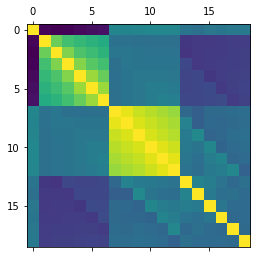

In [77]:
plt.matshow(rawData.corr())

In [78]:
target_names = ["no default", "default"]

In [79]:
#feature importance from some other model because I can't seem to figure out how the heck to figure this out... 

In [80]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [118]:
forest = ExtraTreesClassifier()

In [119]:
forestmodel = forest.fit(x_train, y_train)

In [120]:
forestpred = forestmodel.predict(x_test)

In [121]:
importances = forest.feature_importances_

In [122]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
            axis=0)

In [123]:
indices = np.argsort(importances)[::-1]

In [124]:
print("feature ranking:")
for f in range(x_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature ranking:
1. feature 3 (0.363096)
2. feature 1 (0.285288)
3. feature 0 (0.202448)
4. feature 2 (0.149168)


In [125]:
plt.figure()

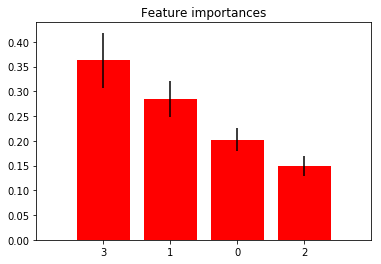

In [126]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_test.shape[1]), indices)
plt.xlim([-1, x_test.shape[1]])
plt.show()

In [92]:
#other visualizations

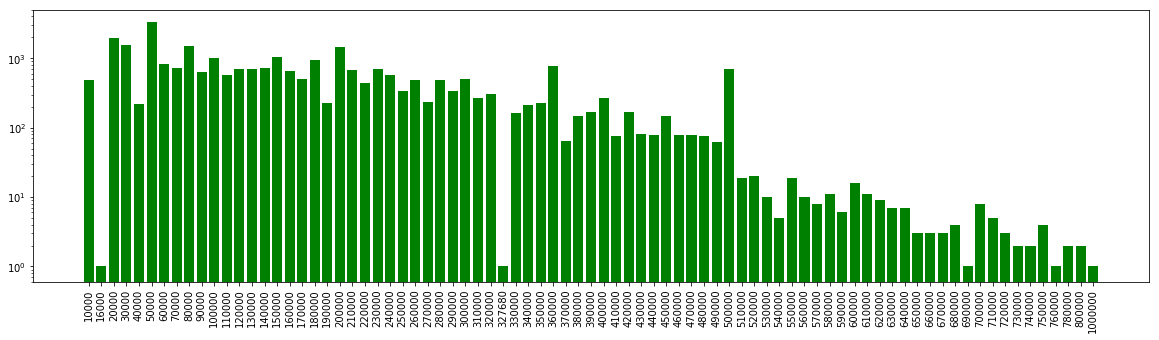

In [93]:
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_subplot(111)

d = rawData.groupby(['LIMIT_BAL']).size()
ax.set_yscale("log")
ax.set_xticks(np.arange(len(d)))
ax.set_xticklabels(['%d' % i for i in d.index], rotation='vertical')
p = ax.bar(np.arange(len(d)),d, color = 'green')

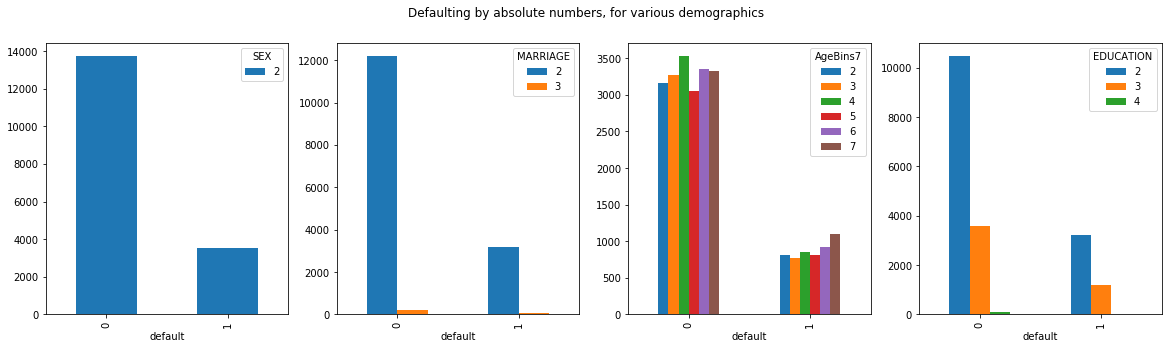

In [94]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

d = rawData.groupby(['default', 'SEX']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = rawData.groupby(['default', 'MARRIAGE']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = rawData.groupby(['default', 'AgeBins7']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

d = rawData.groupby(['default', 'EDUCATION']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[3])

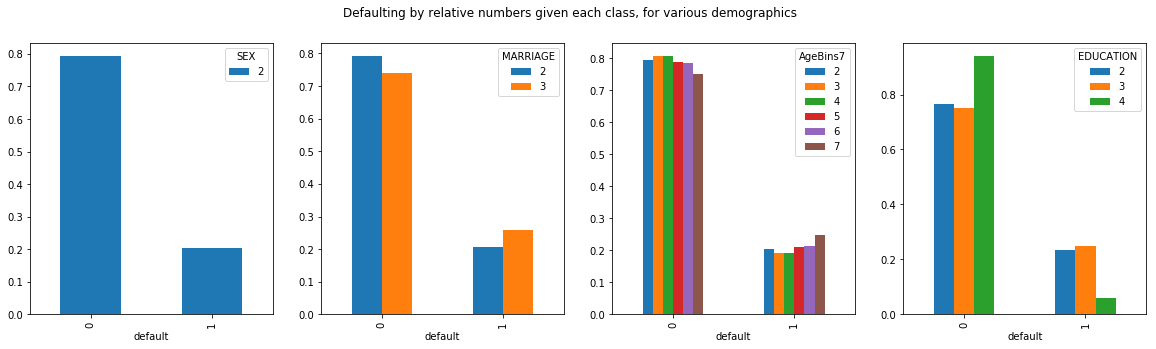

In [98]:
#relative default rates
fig, ax = plt.subplots(1,4)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = rawData.groupby(['default', 'SEX']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = rawData.groupby(['default', 'MARRIAGE']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = rawData.groupby(['default', 'AgeBins7']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

d = rawData.groupby(['default', 'EDUCATION']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[3])

In [96]:
#is there something wrong with my SEX attribute? all of them are missing the 1 code...

In [99]:
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AgeBins7,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,4,1,2,2,-2,-2,...,-15000,-15000,-15000,0,0,0,0,0,0,1
1,200000,1,1,2,4,1,-2,-2,-2,-2,...,-7905,-10213,-11060,0,0,0,0,0,0,0
2,220000,1,3,1,7,1,-2,-2,-2,-2,...,-4620,-5820,-5820,0,0,0,0,0,0,0
3,100000,2,1,2,2,1,-2,-2,-2,-2,...,-4894,-4894,-4894,0,0,0,0,0,0,0
4,50000,1,2,2,1,-1,-1,-2,-2,-2,...,-3650,-3650,-3650,0,0,0,0,0,0,0


In [100]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28742 entries, 0 to 28741
Data columns (total 24 columns):
LIMIT_BAL    28742 non-null int64
SEX          28742 non-null category
EDUCATION    28742 non-null category
MARRIAGE     28742 non-null category
AgeBins7     28742 non-null category
PAY_1        28742 non-null int64
PAY_2        28742 non-null int64
PAY_3        28742 non-null int64
PAY_4        28742 non-null int64
PAY_5        28742 non-null int64
PAY_6        28742 non-null int64
BILL_AMT1    28742 non-null int64
BILL_AMT2    28742 non-null int64
BILL_AMT3    28742 non-null int64
BILL_AMT4    28742 non-null int64
BILL_AMT5    28742 non-null int64
BILL_AMT6    28742 non-null int64
PAY_AMT1     28742 non-null int64
PAY_AMT2     28742 non-null int64
PAY_AMT3     28742 non-null int64
PAY_AMT4     28742 non-null int64
PAY_AMT5     28742 non-null int64
PAY_AMT6     28742 non-null int64
default      28742 non-null category
dtypes: category(5), int64(19)
memory usage: 4.3 MB


NameError: name 'plot_cm' is not defined

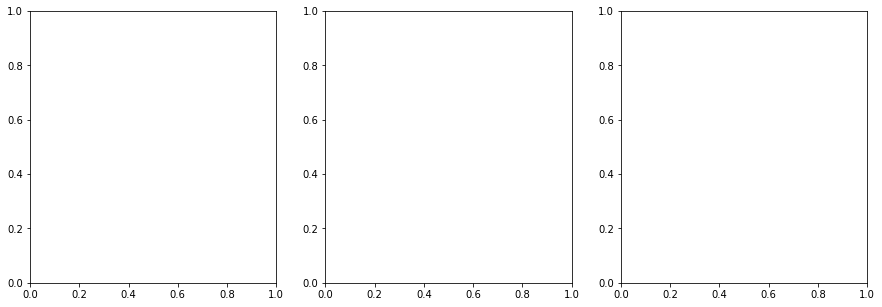

In [101]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

threshold = 0.5
y_train_pred = forestmodel.predict_proba(x_train)[:,1]
y_test_pred = forestmodel.predict_proba(x_test)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [102]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

In [103]:
from sklearn.feature_selection import RFE

In [104]:
demofeatures = rawData.iloc[:, 0:5]

In [105]:
demofeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28742 entries, 0 to 28741
Data columns (total 5 columns):
LIMIT_BAL    28742 non-null int64
SEX          28742 non-null category
EDUCATION    28742 non-null category
MARRIAGE     28742 non-null category
AgeBins7     28742 non-null category
dtypes: category(4), int64(1)
memory usage: 337.6 KB


In [106]:
depVar

0        1
1        0
2        0
3        0
4        0
5        1
6        0
7        0
8        1
9        1
10       1
11       1
12       0
13       1
14       0
15       0
16       1
17       0
18       1
19       0
20       0
21       1
22       1
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
28712    0
28713    0
28714    1
28715    0
28716    0
28717    0
28718    0
28719    0
28720    0
28721    1
28722    0
28723    0
28724    0
28725    0
28726    0
28727    0
28728    0
28729    0
28730    0
28731    1
28732    0
28733    0
28734    0
28735    0
28736    0
28737    0
28738    0
28739    0
28740    0
28741    0
Name: default, Length: 28742, dtype: category
Categories (2, int64): [0, 1]